I will mosrtly use codes from Python 1 class, it will not be too complicated but familiar.

In [1]:
import pandas as pd
import numpy as np
import warnings
import os
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
!pip install matplotlib
!pip install seaborn
import seaborn as sns

In [2]:
 #os.chdir("/Users/feya/Downloads/data science/airbnb-eu-price") #change directory
#print(os.getcwd()) 

In [3]:

print(os.getcwd()) #get current working directory



/Users/feya/Downloads/data science/airbnb-eu-price/notebooks


In [ ]:
df = pd.read_csv("data/raw/abnb_eu.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/abnb_eu.csv'

In [ ]:
df.head()

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,city,weekends
0,319.640053,Private room,False,True,2,False,0,1,9,88,1,4.763360,0.852117,Amsterdam,True
1,347.995219,Private room,False,True,2,False,0,1,9,87,1,5.748310,3.651591,Amsterdam,True
2,482.975183,Private room,False,True,4,False,0,1,9,90,2,0.384872,0.439852,Amsterdam,True
3,485.552926,Private room,False,True,2,True,0,0,10,98,1,0.544723,0.318688,Amsterdam,True
4,2771.541724,Entire home/apt,False,False,4,True,0,0,10,100,3,1.686798,1.458399,Amsterdam,True


In [ ]:
df.to_csv("data/abnb_eu1.csv", index=False) # I saved a raw data's copy in data file which i can use for editting



In [ ]:
df["realSum"] = pd.to_numeric(df["realSum"], errors="coerce").round(0).astype("Int64")


In [ ]:
df["realSum"]

0         320
1         348
2         483
3         486
4        2772
         ... 
51702     219
51703     191
51704     252
51705     638
51706     133
Name: realSum, Length: 51707, dtype: Int64

In [ ]:
df["realSum"].dtypes

Int64Dtype()

In [ ]:
df[["realSum", "city", "guest_satisfaction_overall"]]

,realSum,city,guest_satisfaction_overall
0,320,Amsterdam,88
1,348,Amsterdam,87
2,483,Amsterdam,90
3,486,Amsterdam,98
4,2772,Amsterdam,100
...,...,...,...
51702,219,Vienna,80
51703,191,Vienna,100
51704,252,Vienna,86
51705,638,Vienna,93


In [ ]:
df = df.rename(columns={"realSum": "price", "guest_satisfaction_overall": "rating"})

In [ ]:
df.shape

(51707, 15)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
median_price = df.groupby("city")["price"].median()

In [ ]:
mean_rate = df.groupby("city")["rating"].mean()

In [ ]:
print(median_price)
print(mean_rate)

city
Amsterdam    460.5
Athens       128.0
Barcelona    208.0
Berlin       191.0
Budapest     153.0
Lisbon       225.0
London       261.0
Paris        318.0
Rome         183.0
Vienna       208.0
Name: price, dtype: Float64
city
Amsterdam    94.514423
Athens       95.003598
Barcelona    91.109072
Berlin       94.323671
Budapest     94.585281
Lisbon       91.093875
London       90.645652
Paris        92.037530
Rome         93.122300
Vienna       93.731128
Name: rating, dtype: float64


In [ ]:


# Group by city (or country)
mean_price = df.groupby("city")["price"].mean()
median_price = df.groupby("city")["price"].median()

print("Median price by city:\n", median_price)
print("\nMean price by city:\n", mean_price)


Median price by city:
 city
Amsterdam    460.5
Athens       128.0
Barcelona    208.0
Berlin       191.0
Budapest     153.0
Lisbon       225.0
London       261.0
Paris        318.0
Rome         183.0
Vienna       208.0
Name: price, dtype: Float64

Mean price by city:
 city
Amsterdam    573.108173
Athens       151.740909
Barcelona     293.79527
Berlin       244.599034
Budapest     176.508454
Lisbon       238.220545
London       362.473031
Paris        392.541717
Rome         205.397142
Vienna       241.591462
Name: price, dtype: Float64


In [ ]:
df["median_price"] = "median_price"

In [ ]:
df.columns

Index(['price', 'room_type', 'room_shared', 'room_private', 'person_capacity',
       'host_is_superhost', 'multi', 'biz', 'cleanliness_rating', 'rating',
       'bedrooms', 'dist', 'metro_dist', 'city', 'weekends', 'median_price'],
      dtype='object')

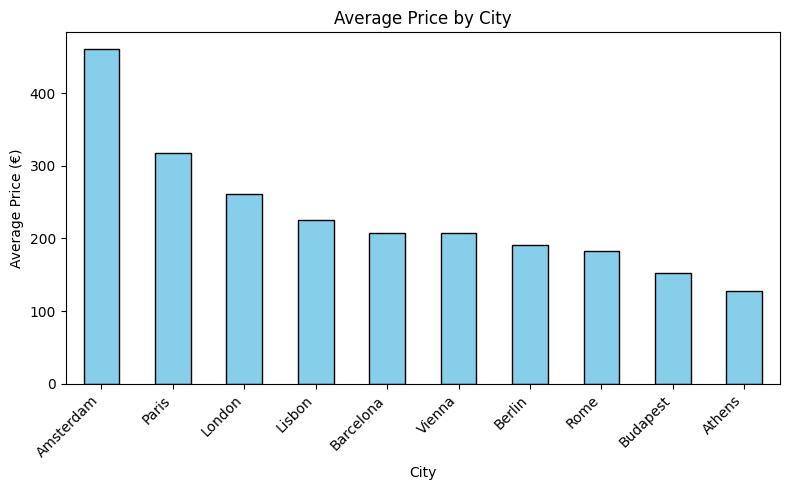

In [ ]:
import matplotlib.pyplot as plt

# Group by country (or city if your column is named that)
median_price = df.groupby("city")["price"].median().sort_values(ascending=False)

# Plot
median_price.plot(kind="bar", color="skyblue", edgecolor="black", figsize=(8,5))
plt.title("Average Price by City")
plt.xlabel("City")
plt.ylabel("Average Price (€)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.savefig("outputs/avg_price_by_city.png", dpi=300, bbox_inches="tight")

plt.show()

In [ ]:
median_price.to_csv("outputs/avg_price_by_city.csv", index=False) #save as csv file
